# Decision tree for Iris_data

## 1.Data visualization

In [17]:
import pydot
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from numpy import *

data = datasets.load_iris() 

print('keys: \n', data.keys())

keys: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


#### Load the data set and check the index in the data set. You can see that the data set includes training data, target data, target data type, training data feature name, and other information.

In [18]:
feature_names = data.get('feature_names')

print('feature names: \n', data.get('feature_names')) 
print('target names: \n', data.get('target_names')) 

x = data.get('data') 
y = data.get('target') 

print(x.shape, y.shape)

feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: 
 ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


#### It can be seen that there are four special types in the training data, and three types in the target data, and a total of 150 sets of data.

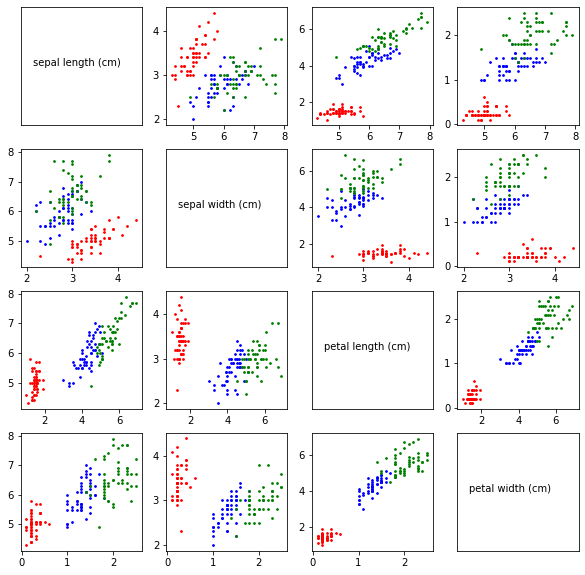

In [19]:
f = []
f.append(y==0) # 类别为第一类的样本的逻辑索引
f.append(y==1) # 类别为第二类的样本的逻辑索引
f.append(y==2) # 类别为第三类的样本的逻辑索引
color = ['red','blue','green']
fig, axes = plt.subplots(4,4,figsize=[10,10]) # 绘制四个属性两两之间的散点图
for i, ax in enumerate(axes.flat):
    row  = i // 4
    col = i % 4
    if row == col:
        ax.text(.1,.5, feature_names[row])
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    for  k in range(3):
        ax.scatter(x[f[k],row], x[f[k],col], c=color[k], s=3)    
fig.subplots_adjust(hspace=0.2, wspace=0.2) 
plt.show()

#### This set of graphs uses scatter plots to describe the relationship between the four features.

####  y has three values of 0, 1, and 2, which represent three different types of flowers. In the figure, they are represented by red, blue, and green colors. And there are four kinds of characteristics, a combination of two, a total of A42 = 12 cases. In this set of figures, the four features are all on the diagonal, so the corresponding features can be found on the y-axis and x-axis of each figure, which shows the relationship between the four features.

## Summary:

#### The above work simply visualizes the data set, mainly looking at the relationship between the features in x.

# 2.Decision tree model and tree graph

In [23]:
import pydot
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


print('Train score:{:.3f}'.format(tree.score(X_train, y_train)))
print('Test score:{:.3f}'.format(tree.score(X_test, y_test)))

Train score:1.000
Test score:1.000


#### In the above model, both the training and test sets scored 1, which is a very good result. However, in fact, in the partitioning of the data set, since the random tree seed is fixed, this is only an accidental result. If you want to evaluate the result more objectively, you should do multiple runs.

In [26]:
number = 50
num = [] ; train_score = [] ; test_score = []

for i in range(number):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=None)
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)

    num.append(i+1)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))

mean_train_score = mean(train_score)
mean_test_score = mean(test_score)

print(train_score)
print(test_score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9333333333333333, 1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 0.9, 1.0, 0.9666666666666667, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 0.9666666666666667]


In [27]:
print(mean_train_score)
print(mean_test_score)

1.0
0.9520000000000002


#### After setting the random tree seed to None, you can see that the results are different each time, running a total of 50 times, taking the average of all the scores can compare the performance of the model.

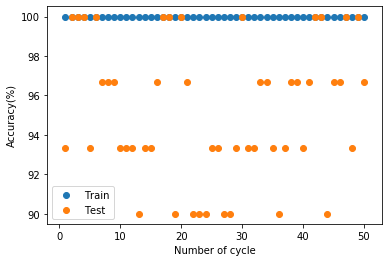

In [28]:
plt.scatter(num,list(map(lambda x:x*100,train_score)),label='Train')
plt.scatter(num,list(map(lambda x:x*100,test_score)),label='Test')
plt.xlabel('Number of cycle')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

#### The scores of each training set and test set are more intuitively represented through visualization.

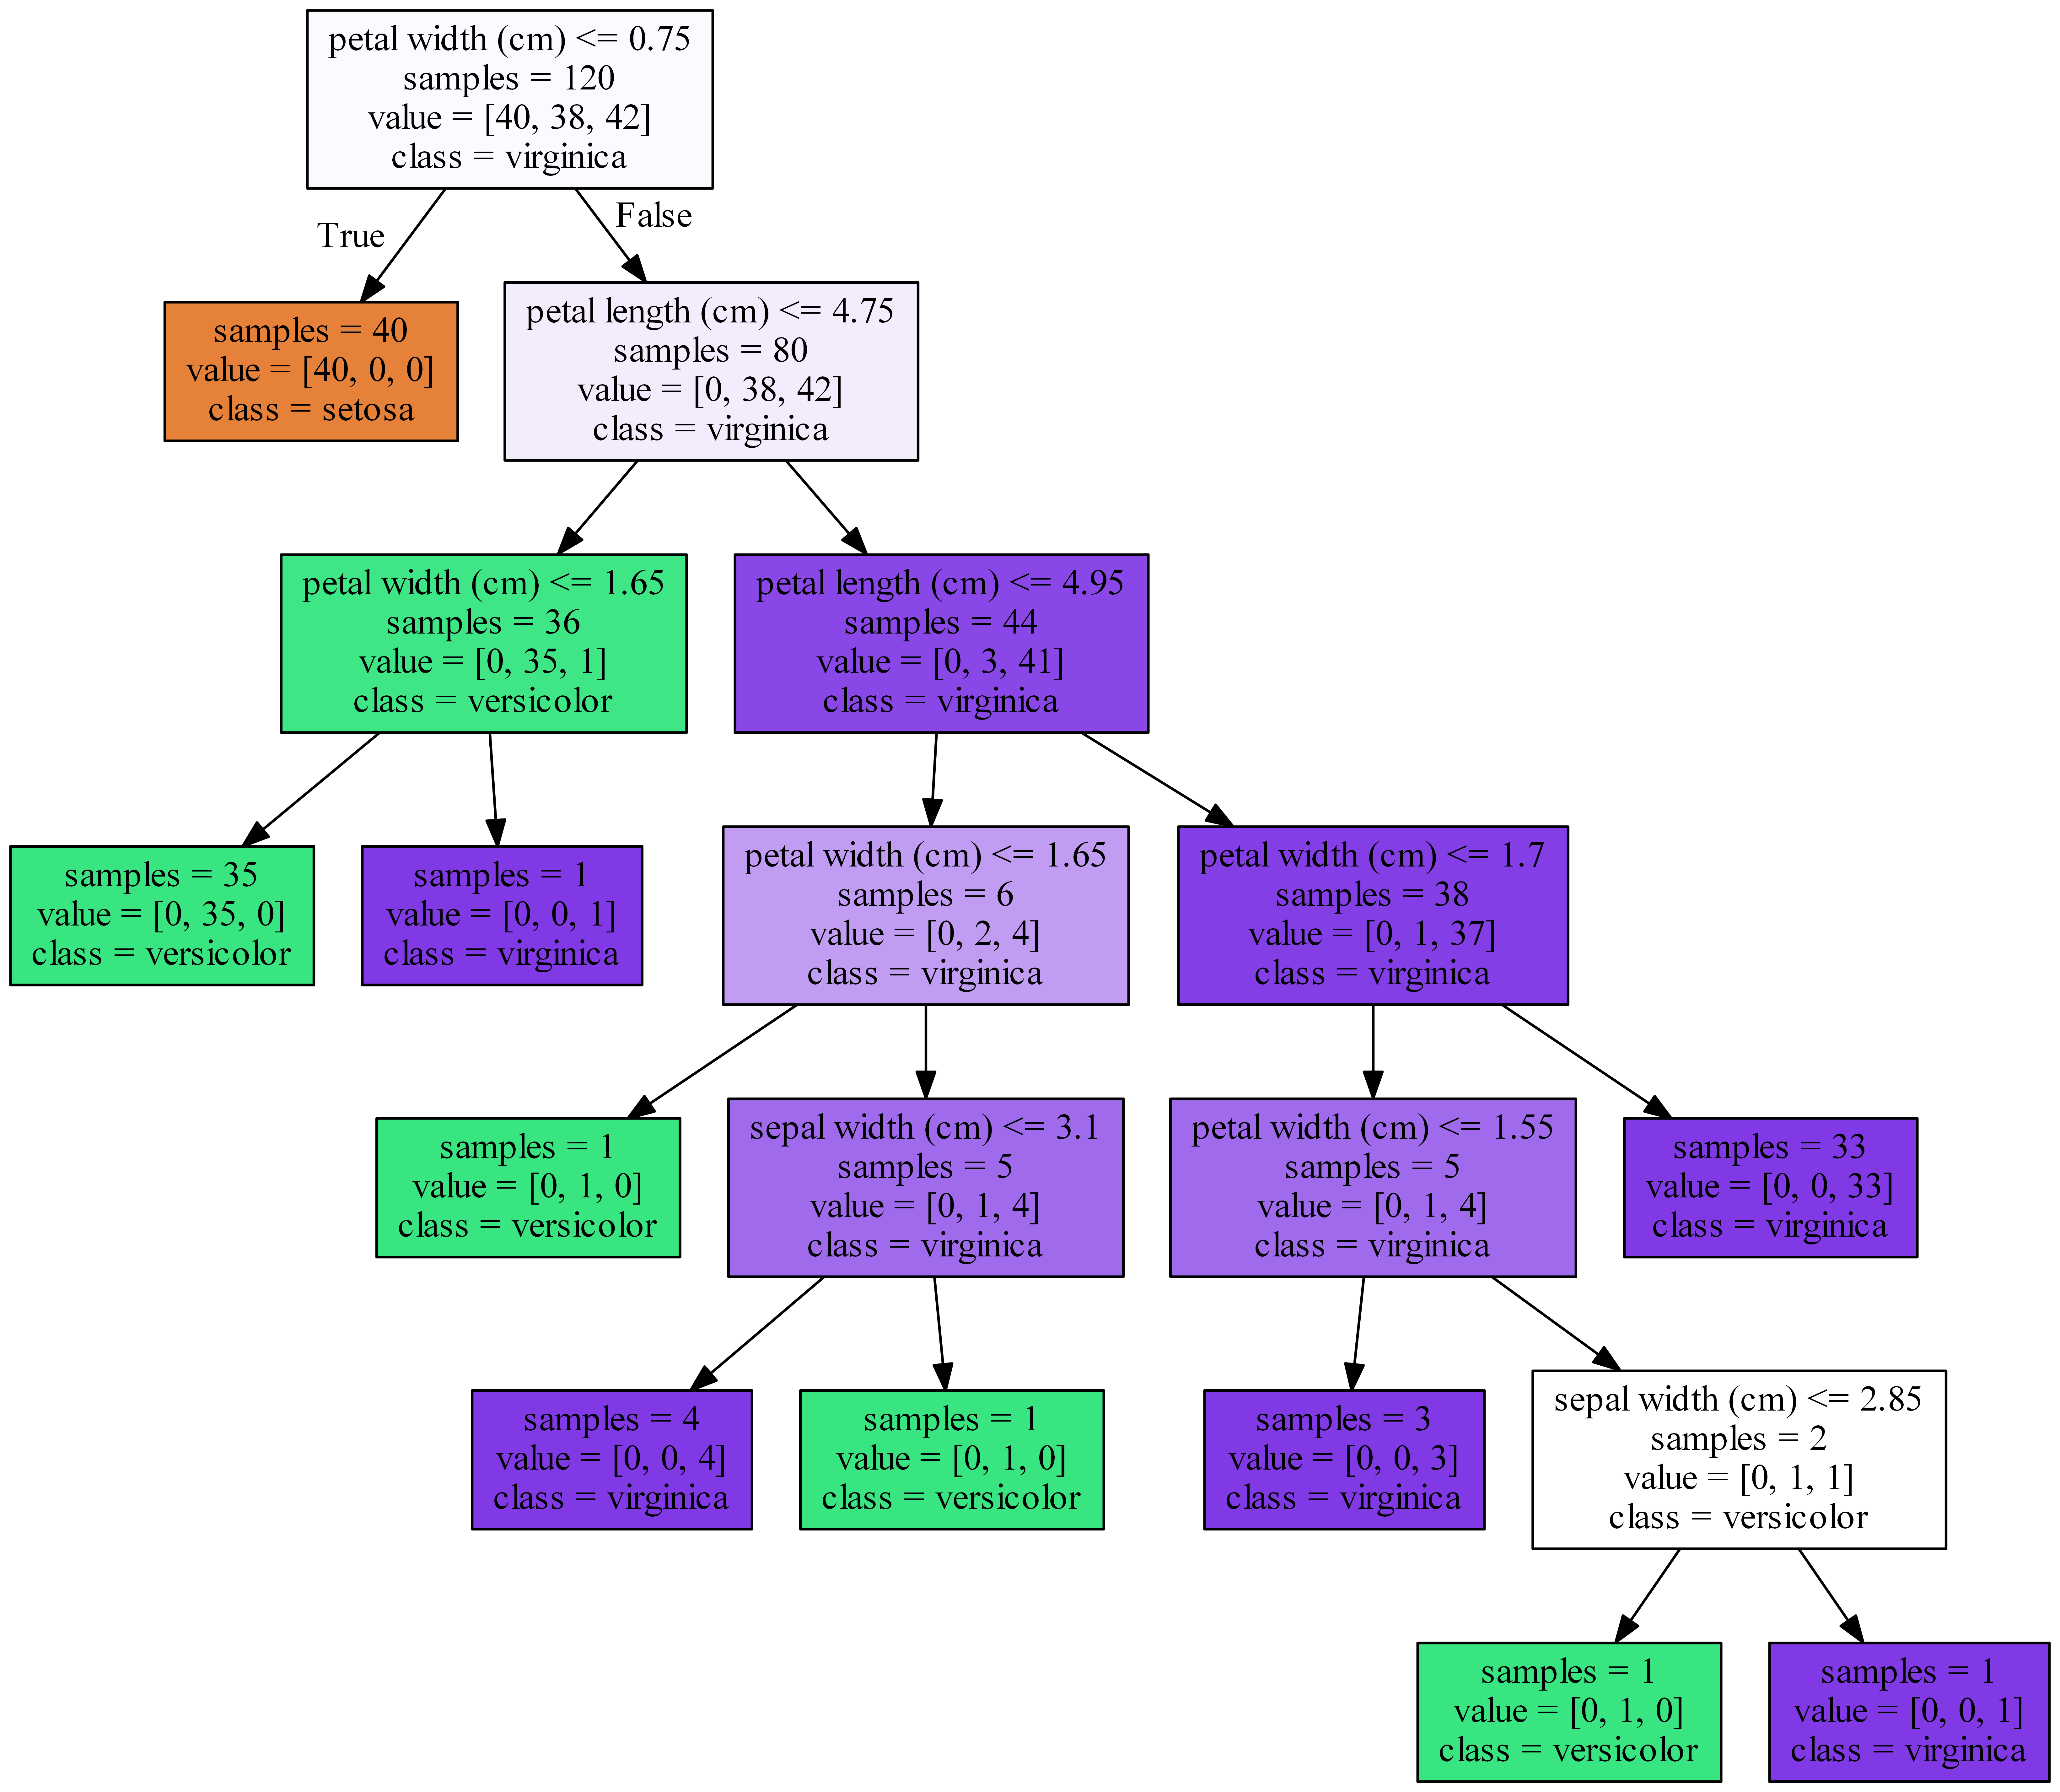

In [29]:
export_graphviz(tree, out_file="tree.dot", class_names=data.target_names, feature_names=data.feature_names,
                    impurity=False, filled=True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'tree.png')


#### Finally, draw the tree of this decision tree model through pydot and graphviz.

#### This decision tree has 7 layers, using Gini index, each time the data of the current parent node is divided into two child nodes by a judgment condition until each group of data has a corresponding class label.

## Summary：
#### The above work uses the CART type in the decision tree. The parameters of the model use the default parameters. The final score is better. The average result is more objective through multiple experiments. The tree diagram of this model is also given. Understand the logic judgment process inside the model.

# 3.Decision tree tuning in the pipeline

In [34]:
import pydot
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=None,stratify=y)

pipe = make_pipeline(StandardScaler(),
                    DecisionTreeClassifier())

params = {'decisiontreeclassifier__splitter':('best','random')
            ,'decisiontreeclassifier__criterion':("gini","entropy")
            ,"decisiontreeclassifier__max_depth":[*range(1,10)]
            ,'decisiontreeclassifier__min_samples_leaf':[*range(1,50,5)]
            ,'decisiontreeclassifier__min_impurity_decrease':[*np.linspace(0,0.5,20)]}

grid = GridSearchCV(pipe,
                param_grid=params,
                cv=10)

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.score(X_test,y_test))

0.975
0.9666666666666667


#### The above work encapsulates the decision tree model, tuning, and data processing in the pipeline. The parameters of tuning parameters include splitter, decision criteria, maximum depth, minimum leaves, etc., and 10% cross-validation is used to finally get the best score.

#### Since the running time after setting multiple experiments is too long, no more experiments are taken here to take the average.

In [39]:
best_estimator = grid.best_estimator_
print(best_estimator)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=8, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=6, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='random'))],
         verbose=False)


#### Output the parameters of the best model.

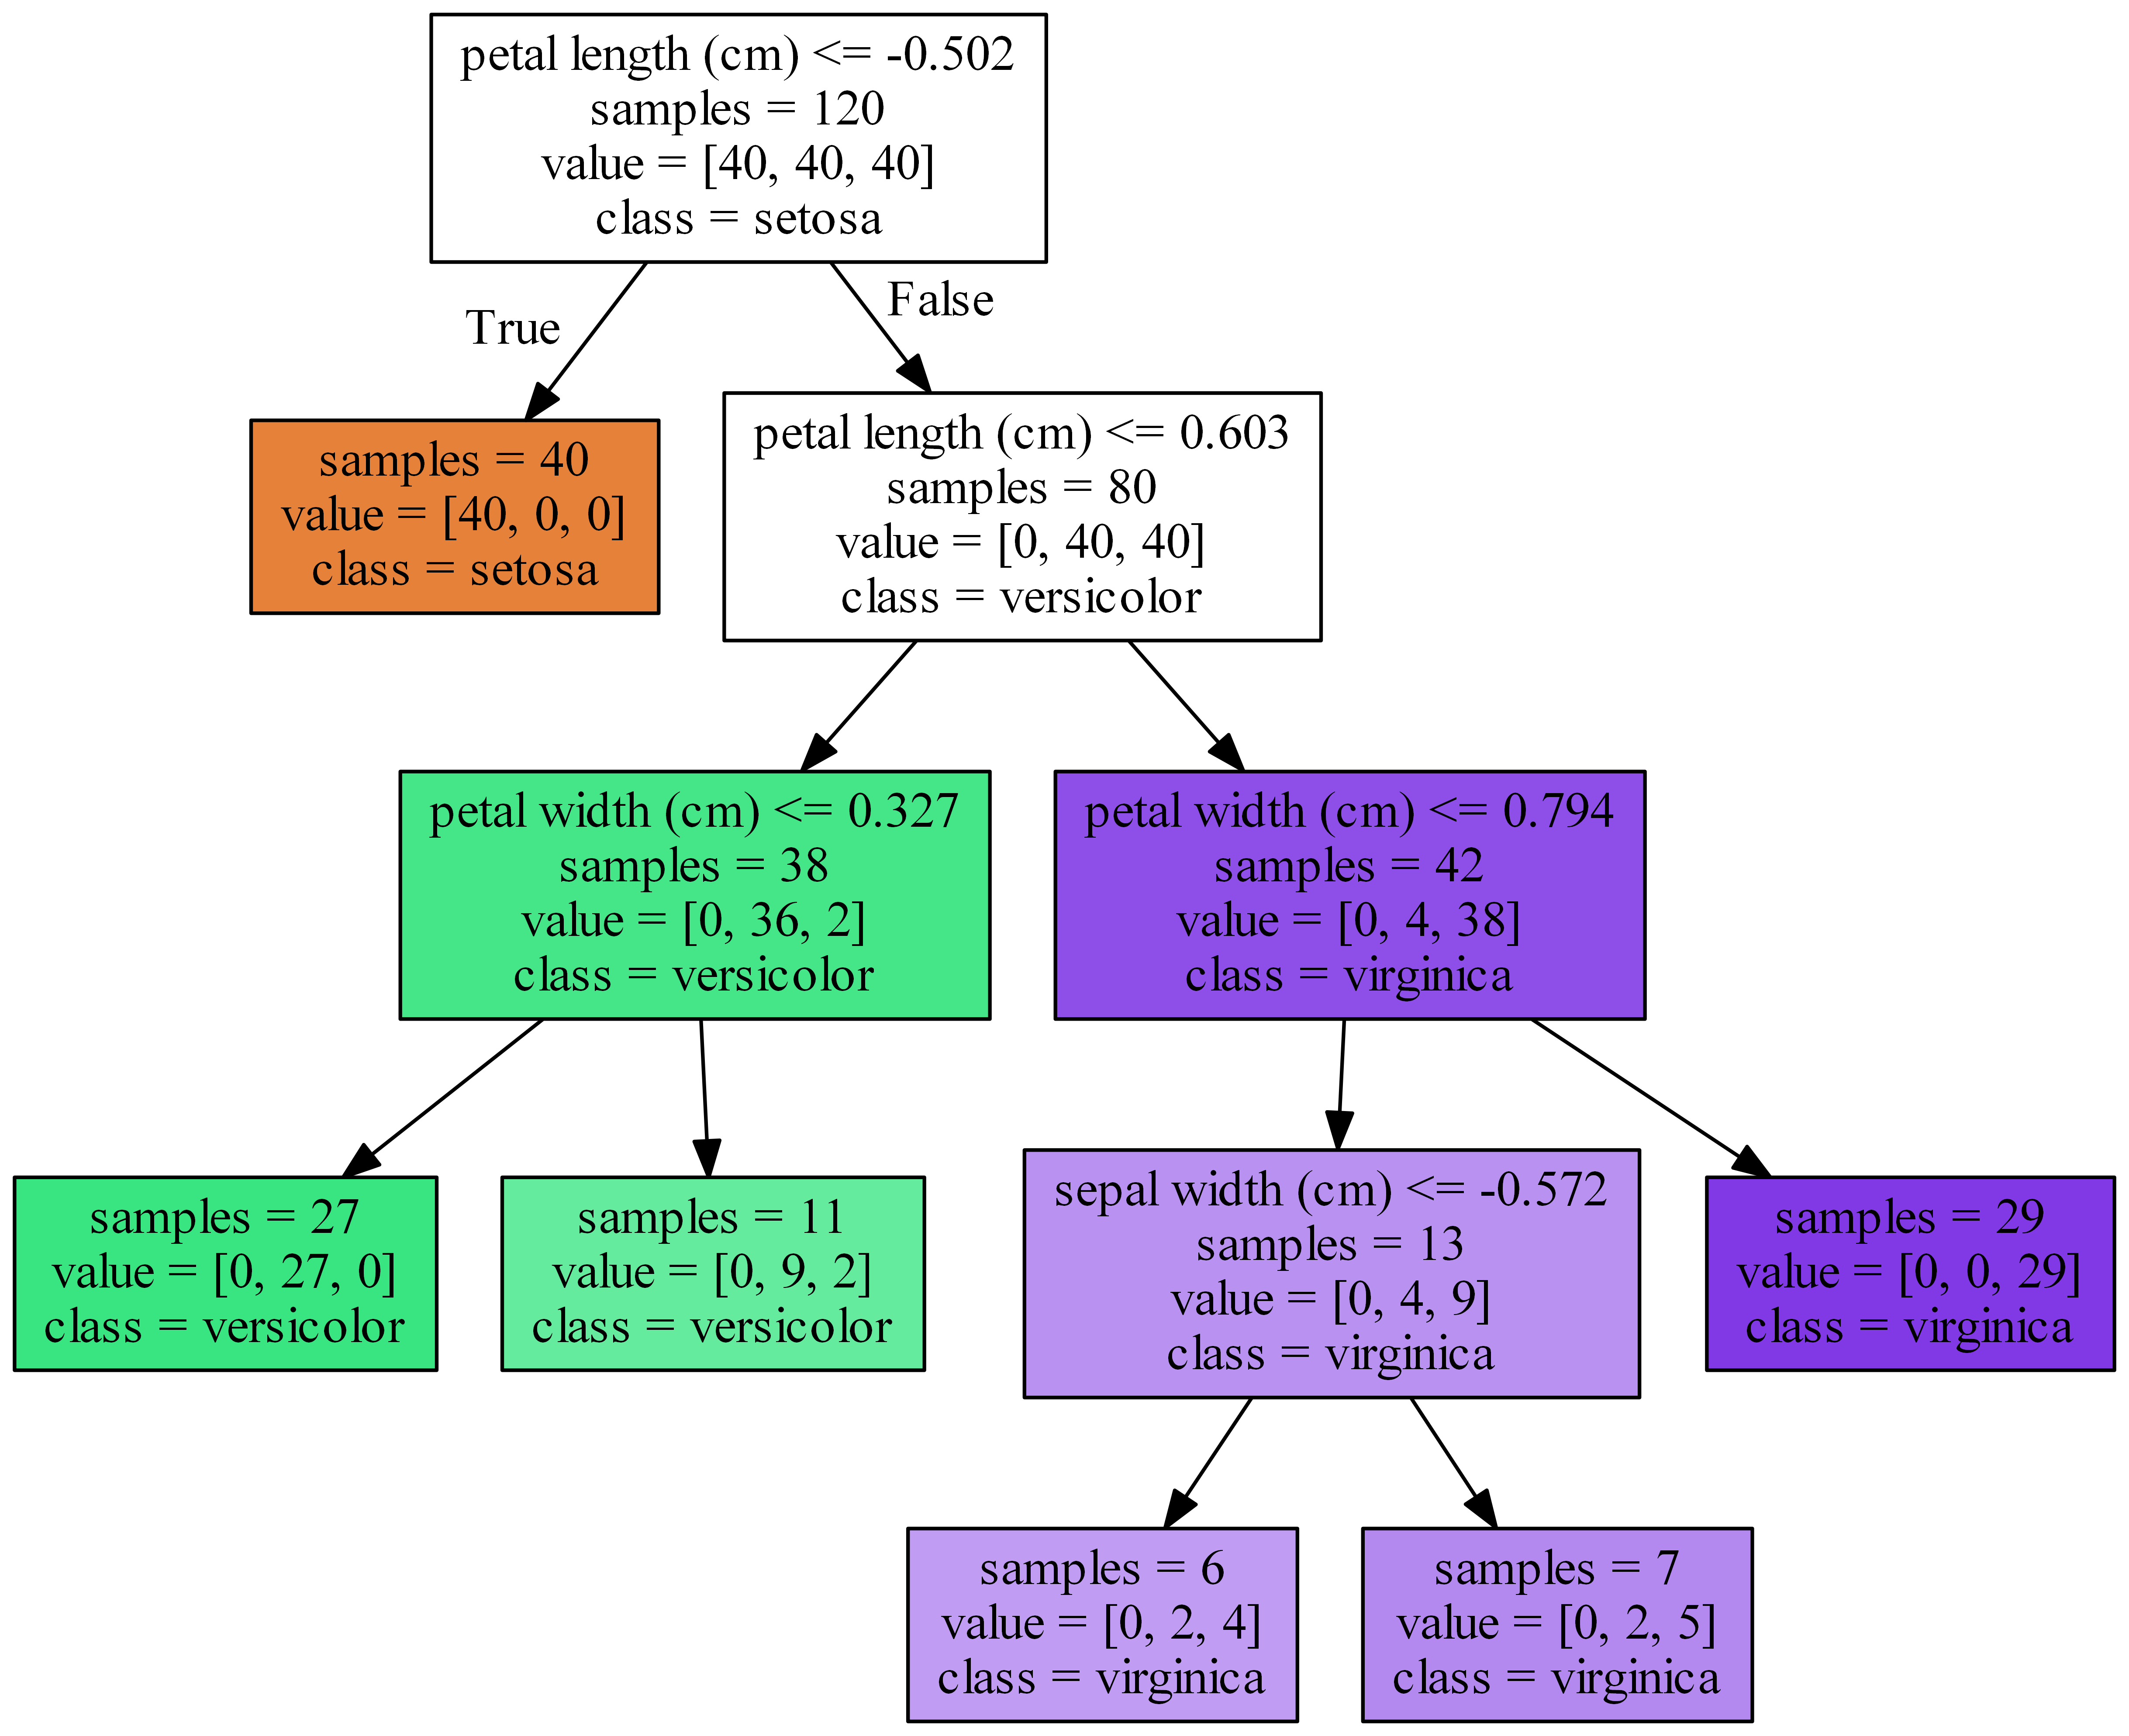

In [44]:
export_graphviz(grid.best_estimator_.named_steps['decisiontreeclassifier'], 
                out_file="tree.dot", class_names=data.target_names, feature_names=data.feature_names,
                    impurity=False, filled=True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'tree.png')

#### Draw a tree graph of the best model.

## Summary：

#### The above work uses the pipeline to implement data processing, fitting, and tuning of decision trees. Finally, the best model's score and tree diagram are given. It can be seen that the metric used by the last best model is entropy, so this is a C4.5 decision tree model.

#### It should be noted that although the maximum depth of the output optimal model parameters is 8, in fact, the tree map has only 5 layers. This is because by the fifth layer, all the data has been classified and the entropy value is 0. Decision trees are unnecessary and will not continue to grow.